In [6]:
# imports
from openai import OpenAI  # OpenAI Python library to make API calls
import requests  # used to download images
import os  # used to access filepaths
from PIL import Image  # used to print and edit images
from dotenv import load_dotenv

load_dotenv()  # take environment variables from .env.

# initialize OpenAI client
client = OpenAI(api_key=os.environ.get("OPENAI_API_KEY"))


In [7]:
# set a directory to save DALL·E images to
image_dir_name = "images"
image_dir = os.path.join(os.curdir, image_dir_name)

# create the directory if it doesn't yet exist
if not os.path.isdir(image_dir):
    os.mkdir(image_dir)

# print the directory to save to
print(f"{image_dir=}")


image_dir='./images'


In [18]:
# create an image

# set the prompt
prompt = "futuristic pyramids of giza in the style of technology"

# call the OpenAI API
generation_response = client.images.generate(
    model = "dall-e-3",
    prompt=prompt,
    n=1,
    size="1024x1024",
    response_format="url",
)

# print response
print(generation_response)

ImagesResponse(created=1711334916, data=[Image(b64_json=None, revised_prompt='Imagine the ancient Pyramids of Giza reimagined in a futuristic setting, where technology has been seamlessly integrated. The structures appear grander and more futuristic than before. Gleaming metal and neon lights replace stone. High-speed flying vehicles zip past the pyramids, while holographic hieroglyphs are projected on the pyramid walls. Advanced machines can be seen assisting humans in their tasks. Moreover, the night sky above is speckled with stars and distant galaxies, providing a surreal backdrop.', url='https://oaidalleapiprodscus.blob.core.windows.net/private/org-I0yk4x97NjPA2smpvRvcQtAM/user-n08uDCjiCsgFupTJEWWYOQ7E/img-Wtzmvvehmtlv4XgLqXB6Inf3.png?st=2024-03-25T01%3A48%3A36Z&se=2024-03-25T03%3A48%3A36Z&sp=r&sv=2021-08-06&sr=b&rscd=inline&rsct=image/png&skoid=6aaadede-4fb3-4698-a8f6-684d7786b067&sktid=a48cca56-e6da-484e-a814-9c849652bcb3&skt=2024-03-24T21%3A13%3A08Z&ske=2024-03-25T21%3A13%3A08Z

In [19]:
# save the image
generated_image_name = "generated_image.png"  # any name you like; the filetype should be .png
generated_image_filepath = os.path.join(image_dir, generated_image_name)
generated_image_url = generation_response.data[0].url  # extract image URL from response
generated_image = requests.get(generated_image_url).content  # download the image

with open(generated_image_filepath, "wb") as image_file:
    image_file.write(generated_image)  # write the image to the file

./images/generated_image.png


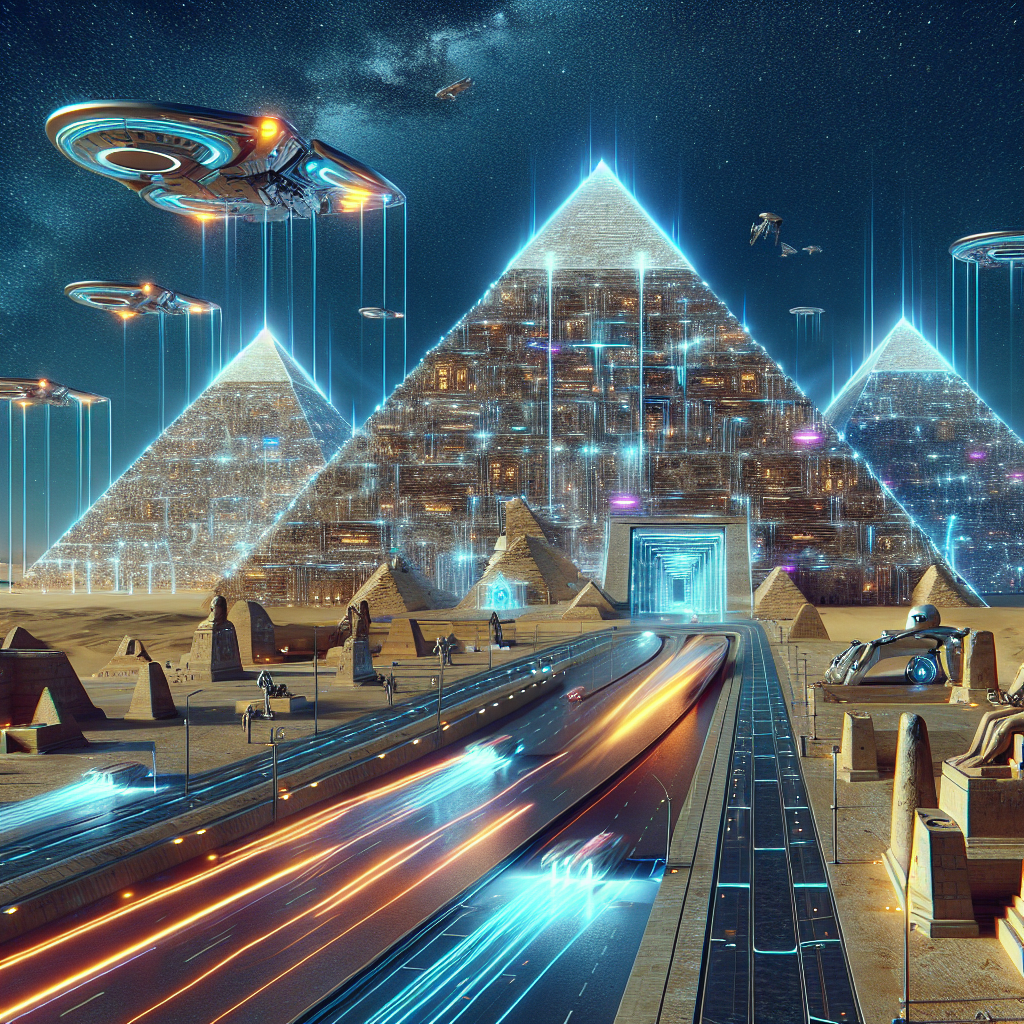

In [20]:
# print the image
print(generated_image_filepath)
display(Image.open(generated_image_filepath))
